In [63]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pandas as pd
import random
import sys
import seaborn as sns

from collections import defaultdict


directory = os.path.join(os.getcwd(), '../../../../Service\service\eeg')
# print(os.path.abspath(directory))

sys.path.append(directory)
from eeg_data_check import Filter, FFTDataCheck

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14568\1833916617.py:14: SyntaxWarning: invalid escape sequence '\s'
  directory = os.path.join(os.getcwd(), '../../../../Service\service\eeg')


In [64]:
# Finding The total from PSS scale 
df_directory = '../../healthy_scale_results.xlsx'
df_pss = pd.read_excel(df_directory, sheet_name = 'PSS')
excluded_columns = ['Sex','Age (years)', 'weight（kg）','height']
df_pss.dropna(axis=0, inplace= True)
df_pss.drop(excluded_columns,axis = 1,inplace= True)
df_pss['Stress'] = (df_pss.drop('ID',axis = 1).sum(axis = 1)/14).round(1)

In [65]:
# Finding The total from POMS scale 
df_poms = pd.read_excel(df_directory, sheet_name='POMS')
selected_colums = ['ID', '1. Tense','8. Uneasy','15. Restless','21. On-edge','28. Nervous','35. Anxious']
df_poms = df_poms[selected_colums]
df_poms['Stress'] = df_poms.drop('ID',axis = 1).sum(axis=1)

In [66]:
sample_seconds = 0.9*1  # Each sample window seconds
sample_freq = 250 # 250hz 

sample_length = int(sample_freq * sample_seconds)
positive_subject_dir = r'C:\Users\Administrator\Desktop\healthy'
print(f"sample length: {sample_length}")

sample length: 225


In [67]:
poms_excluded = df_pss['ID'].to_list()
excluded_subjects = ['A14','A27','A05','A25'] + poms_excluded
df = df_poms[~df_poms['ID'].isin(excluded_subjects)]
emotion = 'Stress'

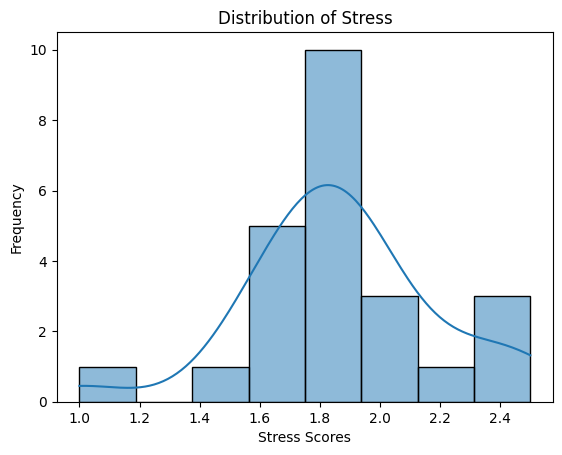

In [68]:
sns.histplot(data=df_pss, x=emotion, kde=True)
plt.title('Distribution of Stress')
plt.xlabel('Stress Scores')
plt.ylabel('Frequency')
plt.show()

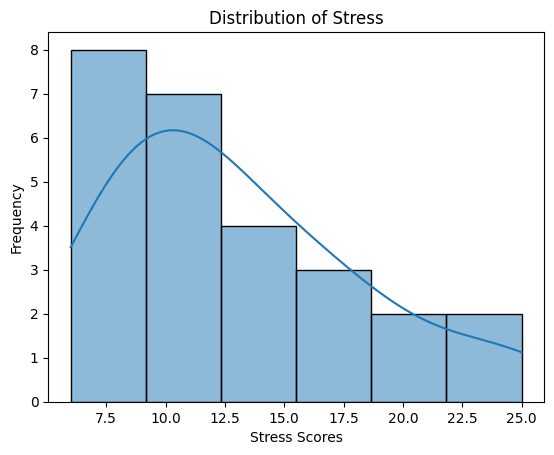

In [69]:
sns.histplot(data=df, x=emotion, kde=True)
plt.title('Distribution of Stress')
plt.xlabel('Stress Scores')
plt.ylabel('Frequency')
plt.show()


In [70]:
negative_subjects_poms = df[df[emotion]< 15]['ID'].to_list()
positive_subjects_poms = df[df[emotion]>= 15
                       ]['ID'].to_list()


negative_subjects_PSS =  df_pss[df_pss[emotion]<2.0]['ID'].to_list()
positive_subjects_PSS= df_pss[df_pss[emotion]>=2.0]['ID'].to_list()

negative_subjects = negative_subjects_poms + negative_subjects_PSS
positive_subjects = positive_subjects_poms + positive_subjects_PSS


In [71]:
random.shuffle(positive_subjects)
random.shuffle(negative_subjects)

print(f"positive subjects count: {len(positive_subjects)}", positive_subjects)
print(f"negative subjects count: {len(negative_subjects)}", negative_subjects)

positive subjects count: 16 ['A33', 'A32', 'A48', 'A22', 'A10', 'A44', 'A40', 'A15', 'A28', 'A17', 'A39', 'A16', 'A03', 'A18', 'A52', 'A12']
negative subjects count: 34 ['A19', 'A50', 'A37', 'A07', 'A51', 'A46', 'A29', 'A38', 'A34', 'A09', 'A21', 'A30', 'A49', 'A41', 'A06', 'A02', 'A23', 'A43', 'A11', 'A08', 'A20', 'A24', 'A13', 'A35', 'A01', 'A36', 'A45', 'A26', 'A54', 'A42', 'A55', 'A47', 'A53', 'A04']


In [83]:

train_positive_subjects = ['A33', 'A32', 'A48', 'A22', 'A10', 'A18', 'A40', 'A15', 'A28', 'A17', 'A12', 'A16']
test_positive_subjects = ['A03', 'A44', 'A52', 'A39']
train_negative_subjects = ['A19', 'A50', 'A37', 'A07', 'A51', 'A46', 'A29', 'A38', 'A34', 'A09', 'A21', 'A30', 'A49', 'A41', 'A06', 'A02', 'A23', 'A43', 'A11', 'A08', 'A20', 'A24', 'A13', 'A35', 'A01', 'A36', 'A45', 'A26', 'A54', 'A42']
test_negative_subjects = ['A55', 'A47', 'A53', 'A04']

print("train positive subjects: ", train_positive_subjects)
print("test positive subjects: ", test_positive_subjects)

print("train negative subjects: ", train_negative_subjects)
print("test negative subjects: ", test_negative_subjects)

train positive subjects:  ['A33', 'A32', 'A48', 'A22', 'A10', 'A18', 'A40', 'A15', 'A28', 'A17', 'A12', 'A16']
test positive subjects:  ['A03', 'A44', 'A52', 'A39']
train negative subjects:  ['A19', 'A50', 'A37', 'A07', 'A51', 'A46', 'A29', 'A38', 'A34', 'A09', 'A21', 'A30', 'A49', 'A41', 'A06', 'A02', 'A23', 'A43', 'A11', 'A08', 'A20', 'A24', 'A13', 'A35', 'A01', 'A36', 'A45', 'A26', 'A54', 'A42']
test negative subjects:  ['A55', 'A47', 'A53', 'A04']


in positive subjects:  ['A33', 'A32', 'A48', 'A22', 'A10', 'A44', 'A40', 'A15', 'A28', 'A17', 'A39', 'A16']
test positive subjects:  ['A03', 'A18', 'A52', 'A12']
train negative subjects:  ['A19', 'A50', 'A37', 'A07', 'A51', 'A46', 'A29', 'A38', 'A34', 'A09', 'A21', 'A30', 'A49', 'A41', 'A06', 'A02', 'A23', 'A43', 'A11', 'A08', 'A20', 'A24', 'A13', 'A35', 'A01', 'A36', 'A45', 'A26', 'A54', 'A42']
test negative subjects:  ['A55', 'A47', 'A53', 'A04']

In [84]:
print(len(train_negative_subjects),len(train_positive_subjects))

30 12


In [85]:
def original_splitting(base_dir: str, target_subjects):
    name = []
    for subject in target_subjects:
        files = os.listdir(base_dir)
        for file in files:
            if file.startswith(subject):
                name.append(file)
    return name

In [86]:
train_positive_subjects_check = original_splitting(positive_subject_dir,train_positive_subjects )
test_positive_subjects_check = original_splitting(positive_subject_dir,test_positive_subjects )
train_negative_subjects_check = original_splitting(positive_subject_dir,train_negative_subjects )
test_negative_subjects_check = original_splitting(positive_subject_dir,test_negative_subjects )


In [87]:
print(len(train_negative_subjects_check),len(train_positive_subjects_check))

38 15


In [88]:
data_filter = FFTDataCheck()

In [89]:
def read_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            # print("reading json file: ", file_path)
            data = json.load(file)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def _get_samples(base_dir: str, target_subjects: list, label: int, data_aug: int=1):
    samples_ret = []
    sample_dict = defaultdict(list)
    for subject in target_subjects:
        files = os.listdir(base_dir)
        for file in files:
            if file.startswith(subject):
                file_path = os.path.join(base_dir, file)
                json_data = read_json_file(file_path)
                left_wave_all, right_wave_all = [], []
                for raw_data in json_data['ProcessedDatas']:
                    left_wave = raw_data['LeftWave']
                    right_wave = raw_data['RightWave']

                    left_wave_all += left_wave
                    right_wave_all += right_wave


                if(len(left_wave_all) != len(right_wave_all)):
                    raise("error!!! left wave count not equal right wave count")
                
                samples = []
                sub_sample = []
                step = sample_length // data_aug

                print(f"step: {step}")
                for idx in range(0, len(left_wave_all), step):
                        # print("idx: ", idx)
                        sub_left_wave = left_wave_all[idx:idx+sample_length]
                        sub_right_wave = right_wave_all[idx:idx+sample_length]
                        if len(sub_left_wave) != sample_length or len(sub_right_wave) != sample_length:
                            continue

                        left_valid = data_filter.is_valid(sub_left_wave)
                        right_valid = data_filter.is_valid(sub_right_wave)

                        print("left_valid: ", left_valid, " right_valid: ", right_valid)
                        if left_valid and right_valid:
                            left_fft = np.abs(np.fft.fft(sub_left_wave))[:64]
                            left_fft = left_fft / np.sum(left_fft)

                            right_fft = np.abs(np.fft.fft(sub_right_wave))[:64]
                            right_fft = right_fft / np.sum(right_fft)

                            feat = np.concatenate([left_fft, right_fft], axis=0)
                            # print(len(feat))
                            samples.append((subject, feat, label))
                            sub_sample.append((feat,label))
                sample_dict[subject].append(sub_sample)
                samples_ret += samples
                print(f"read file: {file_path} left_wave_all: {len(left_wave_all)} sample length: {sample_length} data aug: {data_aug} step: {step}, samples count: {len(samples)}")
                
    return samples_ret,sample_dict


def get_train_negative_samples():
    return _get_samples(base_dir=positive_subject_dir, target_subjects=train_negative_subjects, label=0,data_aug=1)

def get_test_negative_samples():
    return _get_samples(base_dir=positive_subject_dir, target_subjects=test_negative_subjects, label=0)


def get_train_positive_samples():
    return _get_samples(base_dir=positive_subject_dir, target_subjects=train_positive_subjects, label=1, data_aug =3)

def get_test_positive_samples():
    return _get_samples(base_dir=positive_subject_dir, target_subjects=test_positive_subjects, label=1)


train_negative_samples,_ = get_train_negative_samples()
test_negative_samples,test_negative_samples_dict = get_test_negative_samples()

train_positive_samples,_ = get_train_positive_samples()
test_positive_samples, test_positive_samples_dict = get_test_positive_samples()


step: 225
left_valid:  False  right_valid:  False
left_valid:  False  right_valid:  False
left_valid:  False  right_valid:  False
left_valid:  False  right_valid:  False
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid:  True
left_valid:  True  right_valid: 

In [90]:
def lowest_length_check(test_positive_samples_dict):
    Lowest_length = 500000
    data = []
    for key in test_positive_samples_dict.keys():
        length = len(test_positive_samples_dict[key][0])
        if length < Lowest_length:
            Lowest_length = length
    return Lowest_length


def cropping_to_lowest(test_positive_samples_dict,Lowest_length):
    data = []
    for key2 in test_positive_samples_dict.keys():
        val = test_positive_samples_dict[key2][0][0: Lowest_length]
        for chunk in val:
            feat,lab = chunk
            data.append((key2,feat,lab))
    return data



def minimum_length(test_positive_samples_dict, test_negative_samples_dict):
    lowest_length_pos = lowest_length_check(test_positive_samples_dict)
    lowest_length_neg = lowest_length_check(test_negative_samples_dict)

    if lowest_length_neg < lowest_length_pos:
        lowest_length = lowest_length_neg
    else:
        lowest_length = lowest_length_pos

    pos_data = cropping_to_lowest(test_positive_samples_dict, lowest_length)
    neg_data = cropping_to_lowest(test_negative_samples_dict, lowest_length)
    return pos_data,neg_data

In [91]:
print("train_negative_samples count: ", len(train_negative_samples))
print("train_positive_samples count: ", len(train_positive_samples))

print("test_negative_samples count: ", len(test_negative_samples))
print("test_positive_samples count: ", len(test_positive_samples))

#test_negative_samples, test_positive_samples = minimum_length(test_positive_samples_dict, test_negative_samples_dict)

MIN = min(len(test_negative_samples), len(test_positive_samples))
test_negative_samples = test_negative_samples[0:MIN]
test_positive_samples = test_positive_samples[0:MIN]

print("\nAfter truncate: ")
print("test_negative_samples count: ", len(test_negative_samples))
print("test_positive_samples count: ", len(test_positive_samples))


train_negative_samples count:  33613
train_positive_samples count:  30684
test_negative_samples count:  2151
test_positive_samples count:  4772

After truncate: 
test_negative_samples count:  2151
test_positive_samples count:  2151


In [92]:
sample_folder = './samples'
if not os.path.exists(sample_folder):
    os.makedirs(sample_folder)

with open(os.path.join(sample_folder, 'train_negative_samples.pkl'), 'wb') as f:
    pickle.dump(train_negative_samples, f)

with open(os.path.join(sample_folder, 'train_positive_samples.pkl'), 'wb') as f:
    pickle.dump(train_positive_samples, f)

with open(os.path.join(sample_folder, 'test_negative_samples.pkl'), 'wb') as f:
    pickle.dump(test_negative_samples, f)

with open(os.path.join(sample_folder, 'test_positive_samples.pkl'), 'wb') as f:
    pickle.dump(test_positive_samples, f)


In [93]:
print(len(train_negative_samples[0][0]))
print(len(train_positive_samples[0][0]))
print(len(test_negative_samples[0][0]))
print(len(test_positive_samples[0][0]))

3
3
3
3
